## Importing modules

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import plotly.express as px

## Loading Dataset

In [2]:
df = pd.read_csv('AnnualReview_2019_Public_4_GA_20211215 (1).csv')
df.head()

,NTSBNumber,AccidentReport,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,...,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightScheduledType,FlightTerminalType,FlightServiceType,FlightOperationType,DefiningEvent,PhaseOfFlight,IntentionalAct
0,GAA19CA118,AccidentReport,2019-01-02,Appleton,Minnesota,United States,45.227500,-96.004447,NaN,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Loss of Control on Ground,Landing,NaN
1,GAA19CA124,AccidentReport,2019-01-02,Santa Maria Island,Florida,United States,27.500000,-82.746665,NaN,1.0,...,Substantial,Helicopter,Part 91: General aviation,NaN,NaN,NaN,Aerial observation,Loss of Control In-Flight,Maneuvering,NaN
2,WPR19LA054,AccidentReport,2019-01-02,Sacramento,California,United States,38.600833,-121.503334,1.0,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Abnormal Runway Contact,Landing,NaN
3,WPR19LA055,AccidentReport,2019-01-02,Townsend,Montana,United States,46.289165,-111.519447,NaN,2.0,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Low Altitude Operation,Maneuvering,NaN
4,ERA19LA085,AccidentReport,2019-01-03,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,NaN,NaN,...,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Fuel Related,Approach,NaN


## Summary of Dataset

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   NTSBNumber                      1234 non-null   object 
 1   AccidentReport                  1234 non-null   object 
 2   AccidentDate                    1234 non-null   object 
 3   City                            1234 non-null   object 
 4   StateOrRegion                   1214 non-null   object 
 5   Country                         1234 non-null   object 
 6   Latitude                        1231 non-null   float64
 7   Longitude                       1231 non-null   float64
 8   FatalInjuries                   289 non-null    float64
 9   SeriousInjuries                 231 non-null    float64
 10  HighestInjuryLevel              1234 non-null   object 
 11  AircraftNumber                  1234 non-null   int64  
 12  DamageLevel                     12

,Latitude,Longitude,FatalInjuries,SeriousInjuries,AircraftNumber
count,1231.000000,1231.000000,289.000000,231.000000,1234.000000
mean,38.279218,-98.930404,1.453287,0.987013,1.012156
std,8.538461,24.683839,1.462042,0.754583,0.109625
min,-35.897777,-164.611380,0.000000,0.000000,1.000000
25%,33.218750,-115.027088,1.000000,1.000000,1.000000
50%,37.807220,-96.006668,1.000000,1.000000,1.000000
75%,42.016527,-82.627499,2.000000,1.000000,1.000000
max,69.219818,150.144439,11.000000,5.000000,2.000000


## Data Preprocessing 

In [4]:
df.columns

Index(['NTSBNumber', 'AccidentReport', 'AccidentDate', 'City', 'StateOrRegion',
       'Country', 'Latitude', 'Longitude', 'FatalInjuries', 'SeriousInjuries',
       'HighestInjuryLevel', 'AircraftNumber', 'DamageLevel',
       'AircraftCategory', 'RegulationFlightConductedUnder',
       'FlightScheduledType', 'FlightTerminalType', 'FlightServiceType',
       'FlightOperationType', 'DefiningEvent', 'PhaseOfFlight',
       'IntentionalAct'],
      dtype='object')

It can be seen that attributes such as AccidentReport NTSBNumber do not aid in data analysis and can be removed.

In [5]:
df.drop(['AccidentReport', 'NTSBNumber'], inplace = True, axis=1)
df.head()

,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,HighestInjuryLevel,AircraftNumber,DamageLevel,AircraftCategory,RegulationFlightConductedUnder,FlightScheduledType,FlightTerminalType,FlightServiceType,FlightOperationType,DefiningEvent,PhaseOfFlight,IntentionalAct
0,2019-01-02,Appleton,Minnesota,United States,45.227500,-96.004447,NaN,NaN,None,1,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Loss of Control on Ground,Landing,NaN
1,2019-01-02,Santa Maria Island,Florida,United States,27.500000,-82.746665,NaN,1.0,Serious,1,Substantial,Helicopter,Part 91: General aviation,NaN,NaN,NaN,Aerial observation,Loss of Control In-Flight,Maneuvering,NaN
2,2019-01-02,Sacramento,California,United States,38.600833,-121.503334,1.0,NaN,Fatal,1,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Abnormal Runway Contact,Landing,NaN
3,2019-01-02,Townsend,Montana,United States,46.289165,-111.519447,NaN,2.0,Serious,1,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Personal,Low Altitude Operation,Maneuvering,NaN
4,2019-01-03,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,NaN,NaN,None,1,Substantial,Airplane,Part 91: General aviation,NaN,NaN,NaN,Instructional,Fuel Related,Approach,NaN


### Checking for Duplicates

In [6]:
df.duplicated().sum()

0

### Checking for Null Values

In [7]:
df.isnull().sum()

AccidentDate                         0
City                                 0
StateOrRegion                       20
Country                              0
Latitude                             3
Longitude                            3
FatalInjuries                      945
SeriousInjuries                   1003
HighestInjuryLevel                   0
AircraftNumber                       0
DamageLevel                          0
AircraftCategory                     0
RegulationFlightConductedUnder       0
FlightScheduledType               1229
FlightTerminalType                1230
FlightServiceType                 1233
FlightOperationType                 10
DefiningEvent                        4
PhaseOfFlight                        0
IntentionalAct                    1232
dtype: int64

### Deriving attributes of month, year and day

In [9]:
# Date
df[['Month','Day','Year']] = df['AccidentDate'].str.split('-',expand=True)
df.head()

,AccidentDate,City,StateOrRegion,Country,Latitude,Longitude,FatalInjuries,SeriousInjuries,HighestInjuryLevel,AircraftNumber,...,FlightScheduledType,FlightTerminalType,FlightServiceType,FlightOperationType,DefiningEvent,PhaseOfFlight,IntentionalAct,Month,Day,Year
0,2019-01-02,Appleton,Minnesota,United States,45.227500,-96.004447,NaN,NaN,None,1,...,NaN,NaN,NaN,Instructional,Loss of Control on Ground,Landing,NaN,2019,01,02
1,2019-01-02,Santa Maria Island,Florida,United States,27.500000,-82.746665,NaN,1.0,Serious,1,...,NaN,NaN,NaN,Aerial observation,Loss of Control In-Flight,Maneuvering,NaN,2019,01,02
2,2019-01-02,Sacramento,California,United States,38.600833,-121.503334,1.0,NaN,Fatal,1,...,NaN,NaN,NaN,Personal,Abnormal Runway Contact,Landing,NaN,2019,01,02
3,2019-01-02,Townsend,Montana,United States,46.289165,-111.519447,NaN,2.0,Serious,1,...,NaN,NaN,NaN,Personal,Low Altitude Operation,Maneuvering,NaN,2019,01,02
4,2019-01-03,Wilkes-Barre,Pennsylvania,United States,41.000000,-75.000000,NaN,NaN,None,1,...,NaN,NaN,NaN,Instructional,Fuel Related,Approach,NaN,2019,01,03


### Plotting the Correlation Matrix

In [10]:
cormat = df.corr()
round(cormat,2)

,Latitude,Longitude,FatalInjuries,SeriousInjuries,AircraftNumber
Latitude,1.00,-0.49,0.02,0.08,-0.07
Longitude,-0.49,1.00,-0.12,-0.12,-0.01
FatalInjuries,0.02,-0.12,1.00,0.50,-0.02
SeriousInjuries,0.08,-0.12,0.50,1.00,-0.04
AircraftNumber,-0.07,-0.01,-0.02,-0.04,1.00


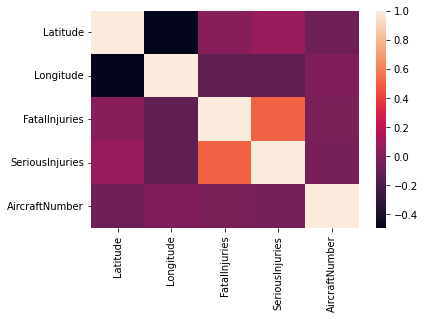

In [ ]:
sns.heatmap(cormat);

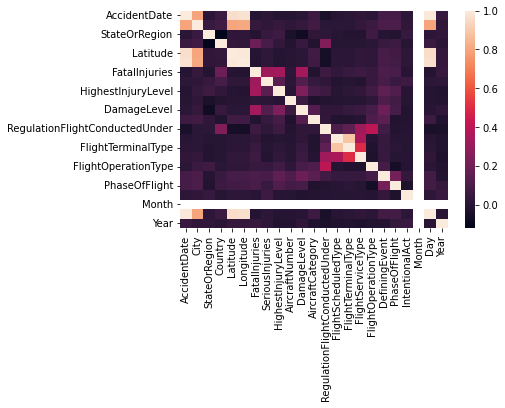

In [11]:
l = df.apply(lambda x: x.factorize()[0]).corr()
# l.head()
sns.heatmap(l);

From the above matrices, it can be seen that no valid correlation exists among variables

## Data Visualization

### Visualizing location of crashes around the world

In [16]:
fig = px.scatter_geo(df, lat='Latitude', lon='Longitude')
fig.update_layout(title = 'Location of Crashes around the world', title_x=0.5)
fig.show()

### Reading data from sheet 2 of dataset

In [17]:
df_acc_no = pd.read_csv('air_crash_numbers.csv')
df_acc_no.head()

,Calendar Year,Fatal,Total
0,2010,271,1441
1,2011,270,1471
2,2012,273,1471
3,2013,221,1223
4,2014,255,1222


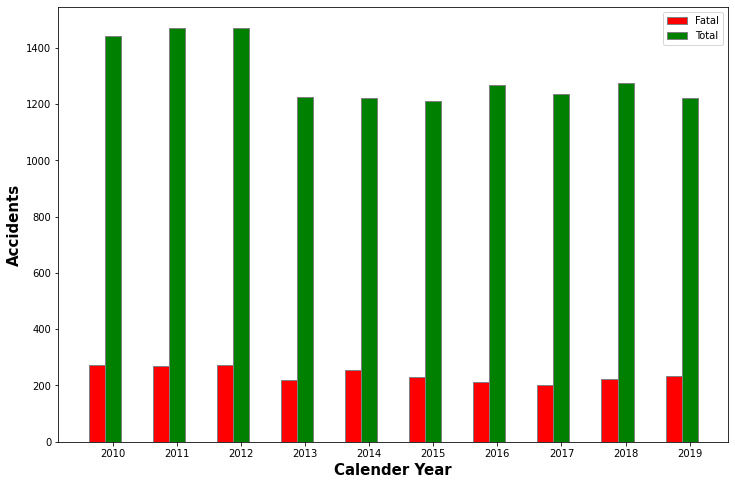

In [22]:
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

br1 = np.arange(len(df_acc_no))
br2 = [x + barWidth for x in br1] 

plt.bar(br1, df_acc_no["Fatal"], color ='r', width = barWidth,
        edgecolor ='grey', label ='Fatal')
plt.bar(br2, df_acc_no["Total"], color ='g', width = barWidth,
        edgecolor ='grey', label ='Total')
 
plt.xlabel('Calender Year', fontweight ='bold', fontsize = 15)
plt.ylabel('Accidents', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(df_acc_no))],
        ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show()